# Exploratory Data Analysis

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("pronostico_dataset seperated.csv")

In [3]:
# Checking first 5 records to get the idea about the dataset
df.head()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy


In [4]:
# Checking last 5 records
df.tail()

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy
5999,5999,62.506825,96.900784,86.878033,108.625436,no_retinopathy


In [5]:
# finding the shape of the dataframe 

df.shape

(6000, 6)

### 6000 Observations with 6 Variables are present in out dataset

In [6]:
#info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            6000 non-null   int64  
 1   age           6000 non-null   float64
 2   systolic_bp   6000 non-null   float64
 3   diastolic_bp  6000 non-null   float64
 4   cholesterol   6000 non-null   float64
 5   prognosis     6000 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 281.4+ KB


### Missing values Imputation is not required as there are no missing values in the dataset

In [7]:
#describing the dataset

df.describe()

,ID,age,systolic_bp,diastolic_bp,cholesterol
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,2999.500000,60.464121,100.694822,90.505547,100.628255
std,1732.195139,8.564392,10.669267,9.648200,10.433915
min,0.000000,35.164761,69.675429,62.807105,69.967453
25%,1499.750000,54.371941,93.267420,83.641788,93.202373
50%,2999.500000,59.831159,100.119926,89.912429,100.060637
75%,4499.250000,65.809652,107.439501,96.682405,107.250829
max,5999.000000,103.279497,151.699660,133.456382,148.233544


In [8]:
#checking the number of null values

df.isnull().sum()

ID              0
age             0
systolic_bp     0
diastolic_bp    0
cholesterol     0
prognosis       0
dtype: int64

### no null values are present in the dataset 

In [9]:
#checking the datatypes of the variables

df.dtypes

ID                int64
age             float64
systolic_bp     float64
diastolic_bp    float64
cholesterol     float64
prognosis        object
dtype: object

### Data Type Conversion is not required as the Data Types of all the columns is in required format except prognosis column

In [10]:
#checking whether there are any duplicated values

df[df.duplicated()]

,ID,age,systolic_bp,diastolic_bp,cholesterol,prognosis


### No duplicate rows are present in the dataset

In [11]:
#renaming the columns for easy usage

df1 = df.rename({'systolic_bp': 'sysbp',"diastolic_bp":"diabp","cholesterol":"chol","prognosis":"prog"}, axis=1)

In [12]:
#updated dataset with new names(short forms)

df1

,ID,age,sysbp,diabp,chol,prog
0,0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...,...
5995,5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [13]:
#removing ID column as it is not required

df2 = df1.drop(["ID"],axis= 1)

In [14]:
#updated dataset

df2

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,retinopathy
1,63.529850,99.379736,84.852361,110.382411,retinopathy
2,69.003986,111.349455,109.850616,100.828246,retinopathy
3,82.638210,95.056128,79.666851,87.066303,retinopathy
4,78.346286,109.154591,90.713220,92.511770,retinopathy
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,no_retinopathy
5996,63.099686,100.039527,93.515186,104.971404,retinopathy
5997,55.562243,98.421446,102.697875,120.875951,retinopathy
5998,63.468956,106.809289,88.060631,106.052213,retinopathy


In [15]:
#importing for the label encoder

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [16]:
#label encoding the prognosis column

df2["prog"] = label_encoder.fit_transform(df2["prog"])

In [17]:
#updated dataset

df2

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


### Correlation Analysis

In [18]:
df2.corr()

,age,sysbp,diabp,chol,prog
age,1.000000,0.010361,-0.005410,-0.006972,0.377440
sysbp,0.010361,1.000000,0.405406,0.406029,0.339842
diabp,-0.005410,0.405406,1.000000,0.398345,0.181541
chol,-0.006972,0.406029,0.398345,1.000000,0.315811
prog,0.377440,0.339842,0.181541,0.315811,1.000000


In [19]:
#info of the updated dataset

df2.info()

#after label encoding now all the variables are numerical type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     6000 non-null   float64
 1   sysbp   6000 non-null   float64
 2   diabp   6000 non-null   float64
 3   chol    6000 non-null   float64
 4   prog    6000 non-null   int32  
dtypes: float64(4), int32(1)
memory usage: 211.1 KB


#Age and Prognosis(Which is the target variable)are mostly correlated.

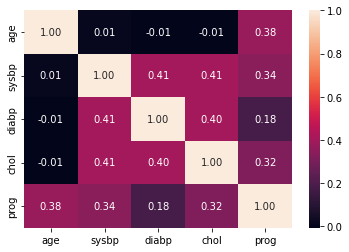

In [20]:
 #heatmap between the correlation of the variables
    
sns.heatmap(df2.corr(),annot=True,fmt=".2f")
plt.show()

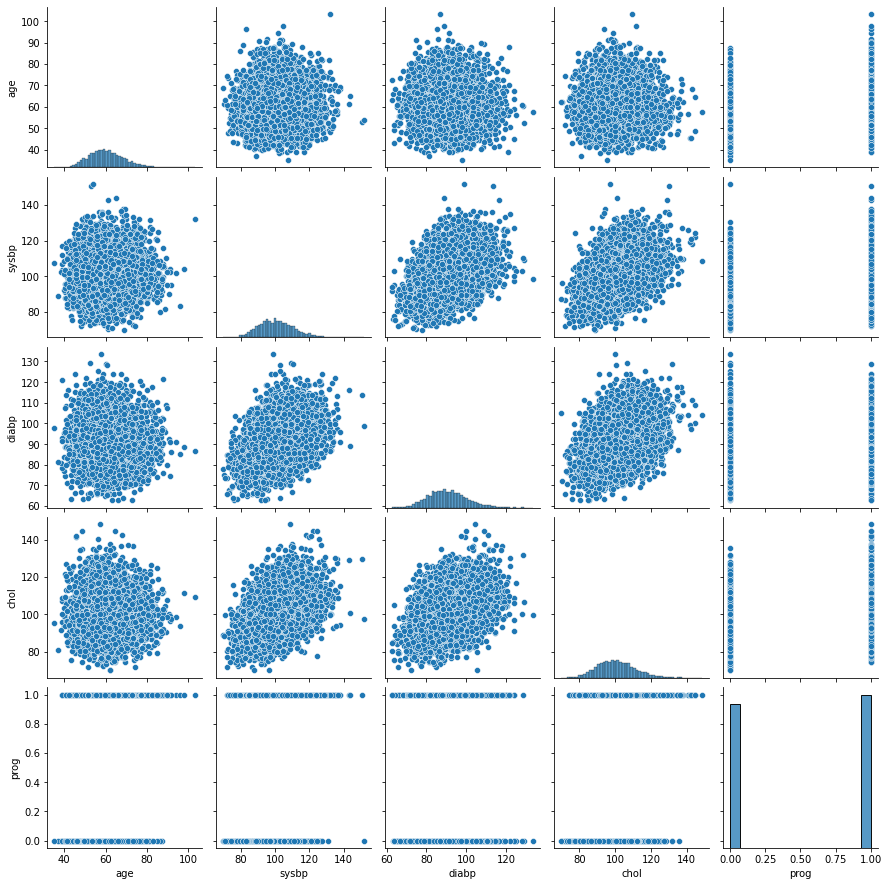

In [21]:
#pairplot of the updated dataset

sns.pairplot(df2)

### Outlier Analysis

<AxesSubplot:>

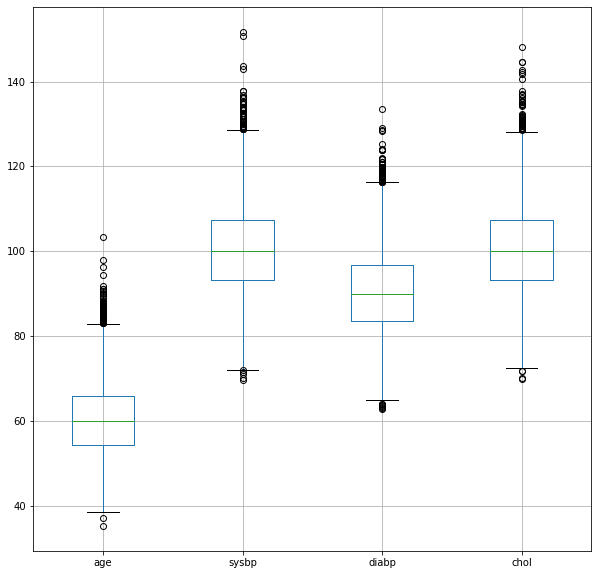

In [22]:
#boxplot for the updated dataset leaving prognosis column(all in one single image)

df2.boxplot(column=['age',"sysbp","diabp","chol"],figsize=(10,10))

<AxesSubplot:>

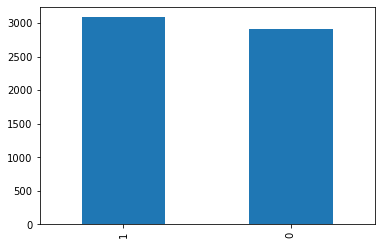

In [23]:
#histogram of the prognosis column

df2['prog'].value_counts().plot.bar()

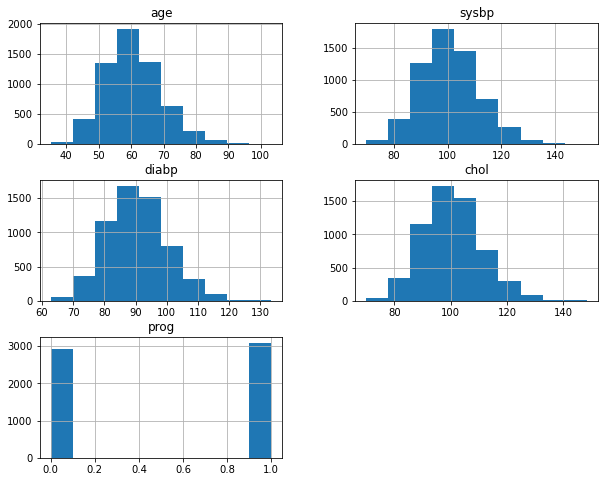

In [24]:
#histogram of the variables
df2.hist(figsize=(10,8))
plt.show()

In [25]:
df2.skew()

age      0.441141
sysbp    0.334655
diabp    0.336555
chol     0.361514
prog    -0.058039
dtype: float64

#### They are moderately skewed

<AxesSubplot:ylabel='prog'>

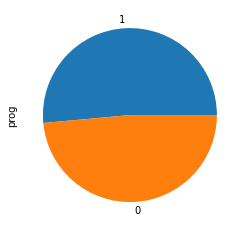

In [26]:
#pie chart of the column prognosis
df2['prog'].value_counts().plot.pie()

# Outlier Detection and Treatment

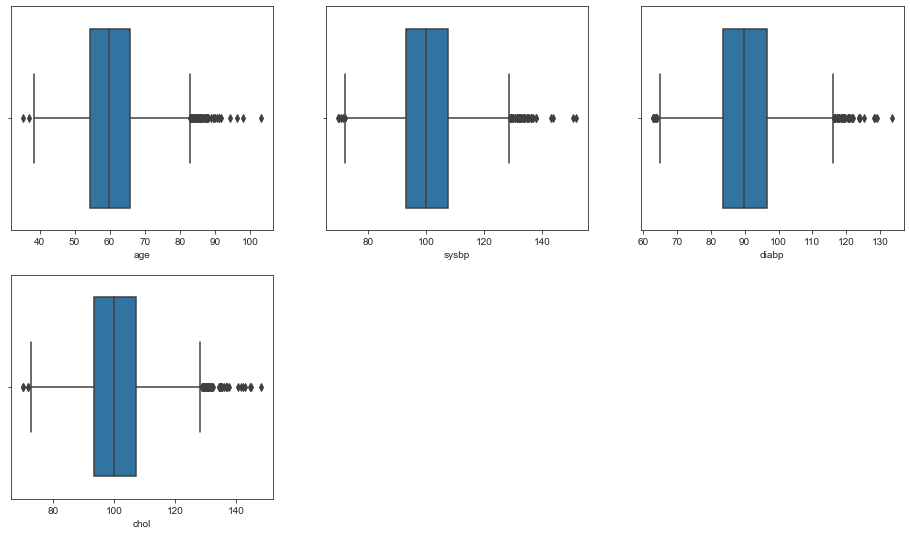

In [27]:
# Horizontal boxplot of the datset images except prognosis

plt.figure(figsize=(16,14))
sns.set_style(style='ticks')
plt.subplot(3,3,1)
sns.boxplot(x='age',data=df2)
plt.subplot(3,3,2)
sns.boxplot(x='sysbp',data=df2)
plt.subplot(3,3,3)
sns.boxplot(x='diabp',data=df2)
plt.subplot(3,3,4)
sns.boxplot(x='chol',data=df2)
plt.show()

### Descriptive Statistics

The difference between min - 25% data and 75% - max range can give us a brief idea about outliers and the analysis is as follows

In [28]:
df2.describe()

,age,sysbp,diabp,chol,prog
count,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,60.464121,100.694822,90.505547,100.628255,0.514500
std,8.564392,10.669267,9.648200,10.433915,0.499831
min,35.164761,69.675429,62.807105,69.967453,0.000000
25%,54.371941,93.267420,83.641788,93.202373,0.000000
50%,59.831159,100.119926,89.912429,100.060637,1.000000
75%,65.809652,107.439501,96.682405,107.250829,1.000000
max,103.279497,151.699660,133.456382,148.233544,1.000000


In [29]:
#count value of the prognosis column

df2["prog"].value_counts()

1    3087
0    2913
Name: prog, dtype: int64

#### Detection of Outliers by using Capping method

In [30]:
# Capping Method: In this technique, we cap our outliers data and make the limit i.e,upper limit and lower limit,
#      values that are above the upper limit value or less than the lower limit value will be considered as outliers.

#IQR(Inter Quartile Range) = Q3 - Q1

#Q3 = 75th percentile of the variable.
#Q1 = 25th percentile of the variable.

#Upper Limit Value = Q3 + 1.5* IQR.
#lower Limit Value = Q1 - 1.5* IQR.

In [31]:
# Let's keep a copy or data before removing outliers
df3 = df2.copy()
df3

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [32]:
def find_boundaries(df2,variables):
    #lets find the IQR
    Q1 = df2[variables].quantile(.25)
    Q3 = df2[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5* IQR
    upper_boundary = Q3 + 1.5*IQR
    
    return lower_boundary , upper_boundary

In [33]:
lower_age_limit , upper_age_limit = find_boundaries(df2 ,'age')
print("upper limit for age is" ,upper_age_limit)
print("lower limit for age is" ,lower_age_limit)


upper limit for age is 82.96621900375001
lower limit for age is 37.21537407374999


In [34]:
df2['age'] = np.where(df2["age"] > upper_age_limit,upper_age_limit,
                np.where(df2["age"] < lower_age_limit,lower_age_limit , df2["age"]))

In [35]:
lower_sysbp_limit , upper_sysbp_limit = find_boundaries(df2 ,'sysbp')
print("upper limit for sysbp is" ,upper_sysbp_limit)
print("lower limit for sysbp is" ,lower_sysbp_limit)


upper limit for sysbp is 128.69762366999998
lower limit for sysbp is 72.00929774999999


In [36]:
df2['sysbp'] = np.where(df2["sysbp"] > upper_sysbp_limit,upper_sysbp_limit,
                np.where(df2["sysbp"] < lower_sysbp_limit,lower_sysbp_limit , df2["sysbp"]))

In [37]:
lower_diabp_limit , upper_diabp_limit = find_boundaries(df2 ,'diabp')
print("upper limit for diabp is" ,upper_diabp_limit)
print("lower limit for diabp is" ,lower_diabp_limit)

upper limit for diabp is 116.24333034999998
lower limit for diabp is 64.08086217000002


In [38]:
df2['diabp'] = np.where(df2["diabp"] > upper_diabp_limit,upper_diabp_limit,
                np.where(df2["diabp"] < lower_diabp_limit ,lower_diabp_limit , df2["diabp"]))

In [39]:
lower_chol_limit , upper_chol_limit = find_boundaries(df2 ,'chol')
print("upper limit for chol is" ,upper_chol_limit)
print("lower limit for chol is" ,lower_chol_limit)

upper limit for chol is 128.32351358375
lower limit for chol is 72.12968849375


In [40]:
df2['chol'] = np.where(df2["chol"] > upper_chol_limit,upper_chol_limit,
                np.where(df2["chol"] < lower_chol_limit,lower_chol_limit,df2["chol"]))

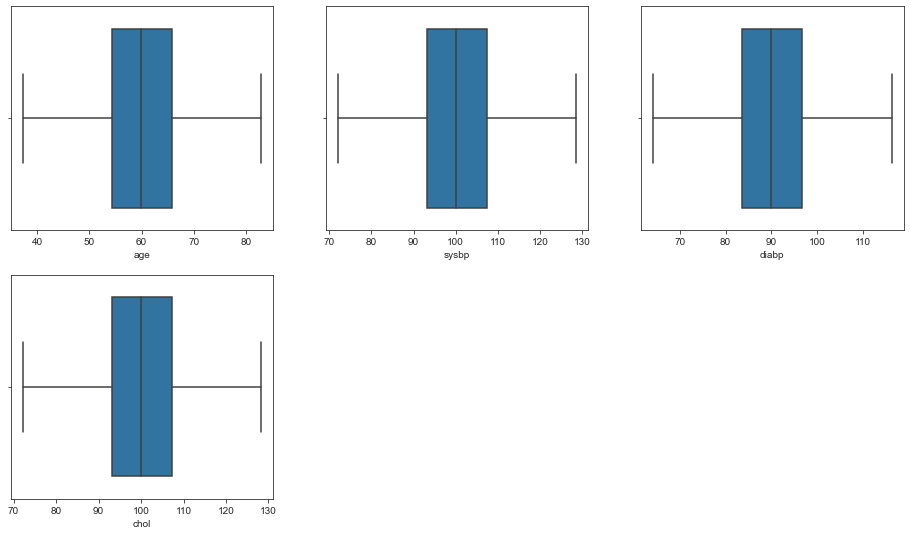

In [41]:
#Boxplot for data without Outliers.

plt.figure(figsize=(16,14))
sns.set_style(style='ticks')
plt.subplot(3,3,1)
sns.boxplot(x='age',data=df2)
plt.subplot(3,3,2)
sns.boxplot(x='sysbp',data=df2)
plt.subplot(3,3,3)
sns.boxplot(x='diabp',data=df2)
plt.subplot(3,3,4)
sns.boxplot(x='chol',data=df2)
plt.show()

### Standardisation of the data

In [42]:
# Importing required libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [43]:
df4 = df2.drop(["prog"],axis= 1)

In [44]:
scaler=StandardScaler()

data_scaled=scaler.fit_transform(df4)
std=pd.DataFrame(scaler.fit_transform(df4),columns=df4.columns)

In [45]:
std

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


# Auto_EDA

In [46]:
import pandas_profiling as pp
import sweetviz as sv

In [47]:
#EDA_report= pp.ProfileReport(df2)
#EDA_report.to_file(output_file='report.html')

In [48]:
#sweet_report = sv.analyze(df2)
#sweet_report.show_html('prognosis_report.html')

# MODEL BUILDING

# LOGISTIC REGRESSION 

In [49]:
# RENAMING THE ORIGINAL DATASET FOR LOGISTIC REGRESSION MODEL 
dfL = df2
dfL

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [50]:
#SEPERATING THE TARGET AND PREDICTOR VARIABLES 
# X = PREDICTORS .
# Y = TARGET.""
x = dfL.drop('prog',axis=1)
y = dfL['prog']
x

,age,sysbp,diabp,chol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [51]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [52]:
#TRAIN TEST SPLITTING

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.50,random_state=100)

In [53]:
from sklearn.linear_model import LogisticRegression
modellogr = LogisticRegression()
modellogr.fit(X_train,y_train)


LogisticRegression()

In [54]:
y_pred = modellogr.predict(X_test)

In [55]:
y_pred = modellogr.predict(X_test)
print('Train Score is : ' , modellogr.score(X_train, y_train))
print('Test Score is : ' , modellogr.score(X_test, y_test))

Train Score is :  0.7396666666666667
Test Score is :  0.7526666666666667


In [56]:
pd.DataFrame({"Actual":y_test,"Prediction":y_pred})

,Actual,Prediction
1469,1,1
3556,0,0
291,0,0
5483,0,0
4567,1,1
...,...,...
1658,1,1
472,1,1
4496,0,0
4263,0,0


In [57]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [58]:
cmlo = confusion_matrix(y_test,y_pred)
cmlo

array([[1115,  367],
       [ 375, 1143]], dtype=int64)

In [59]:
accuracy_score(y_test,y_pred) 

0.7526666666666667

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1482
           1       0.76      0.75      0.75      1518

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



In [61]:
from sklearn.metrics import roc_curve,roc_auc_score

In [62]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)

auc = roc_auc_score(y_test,y_pred)

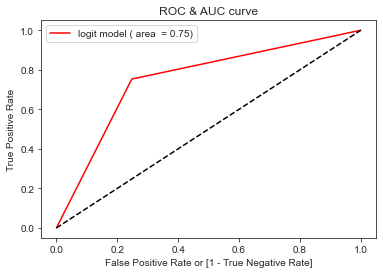

In [63]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC & AUC curve")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# LOGISTIC REGRESSION WITH STANDARDISED VALUES

In [64]:
C = std
C

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [65]:
D = y
D

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [66]:
C_train,C_test,D_train,D_test = train_test_split(C,D,test_size=0.50,random_state=100)

In [67]:
from sklearn.linear_model import LogisticRegression
modellr = LogisticRegression()
modellr.fit(C_train,D_train)

LogisticRegression()

In [68]:
D_pred = modellr.predict(C_test)

In [69]:
print('Train Score is : ' ,modellr.score(C_train, D_train))
print('Test Score is : ' , modellr.score(C_test, D_test))

Train Score is :  0.7396666666666667
Test Score is :  0.7526666666666667


In [70]:
pd.DataFrame({"Actual":D_test,"Prediction":D_pred})

,Actual,Prediction
1469,1,1
3556,0,0
291,0,0
5483,0,0
4567,1,1
...,...,...
1658,1,1
472,1,1
4496,0,0
4263,0,0


In [71]:
confum = confusion_matrix(D_test,D_pred)
confum

array([[1115,  367],
       [ 375, 1143]], dtype=int64)

In [72]:
accuracy_score(D_test,D_pred)

0.7526666666666667

LOGISTIC REGRESSION MODEL WITH STANDARDISED VALUES = 75.26%

In [73]:
print(classification_report(D_test,D_pred))

              precision    recall  f1-score   support

           0       0.75      0.75      0.75      1482
           1       0.76      0.75      0.75      1518

    accuracy                           0.75      3000
   macro avg       0.75      0.75      0.75      3000
weighted avg       0.75      0.75      0.75      3000



# USER TESTING FOR LOGISTIC REGRESSION MODEL

In [74]:
dfL.head()

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1


In [75]:
def user_testing(data):
    new = pd.DataFrame(data,index=[0])
    result = modellr.predict(new)[0]
    if result==0:
        print("NO")
    else:
        print("YES")

In [76]:
data = {"age":62,"sysbp":109,"diabp":79,"chol":126}

In [77]:
user_testing(data)

YES


# SUPPORT VECTOR MACHINE

In [78]:
# RENAMING THE COLUMN FOR USING IN SVM MODEL
dfs = df2
dfs

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [79]:
#SEPERATING THE TARGET AND PREDICTORS
#x1 = PREDICTORS
#y1 = TARGET.
x1 = dfs.drop('prog',axis=1)
y1 = dfs['prog']
x1

,age,sysbp,diabp,chol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [80]:
y1

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [81]:
#standardisation done 
std

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [82]:
#RENAMING THE DATASET.
svmstd = std
svmstd

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [83]:
from sklearn.svm import SVC 
svm = SVC(probability=True) # build the model

In [84]:
Q_train,Q_test,W_train,W_test = train_test_split(x1,y1,test_size = 0.50, random_state = 0)

In [85]:
svm.fit(Q_train, W_train)

SVC(probability=True)

In [86]:
SVM_pred = svm.predict(Q_test)

In [87]:
print('Train Score is : ' , svm.score(Q_train, W_train))
print('Test Score is : ' , svm.score(Q_test, W_test)) 

Train Score is :  0.7486666666666667
Test Score is :  0.755


In [88]:
print('Classification Report is: \n \n' , classification_report(W_test, SVM_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

           0       0.77      0.72      0.74      1467
           1       0.74      0.79      0.77      1533

    accuracy                           0.76      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.76      0.75      3000



In [89]:
print('The accuracy score is:', accuracy_score(W_test, SVM_pred)) # accuracy score
cm = confusion_matrix(W_test,SVM_pred) # Confusion matrix 
print('\n Confusion matrix \n \n', cm)
print(classification_report(W_test,SVM_pred )) #75.5%

The accuracy score is: 0.755

 Confusion matrix 
 
 [[1049  418]
 [ 317 1216]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1467
           1       0.74      0.79      0.77      1533

    accuracy                           0.76      3000
   macro avg       0.76      0.75      0.75      3000
weighted avg       0.76      0.76      0.75      3000



In [90]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [91]:
S_train,S_test,V_train,V_test = train_test_split(x1,y1,test_size = 0.25, random_state = 0)

In [92]:
model_linear0 = SVC(kernel = "linear")
model_linear0.fit(S_train,V_train)
pred_test_linear0 = model_linear0.predict(S_test)

In [93]:
np.mean(pred_test_linear0==V_test)*100  # Linear Model accuracy =75.4%

75.4

In [94]:
print('Train Score is : ' ,model_linear0 .score(S_train, V_train))
print('Test Score is : ' , model_linear0 .score(S_test, V_test))

Train Score is :  0.7411111111111112
Test Score is :  0.754


In [95]:
model_poly0 = SVC(kernel = "poly")
model_poly0.fit(S_train,V_train)
pred_test_poly0 = model_poly0.predict(S_test)

In [96]:
np.mean(pred_test_poly0==V_test)*100 

75.33333333333333

In [97]:
print('Train Score is : ' ,model_poly0 .score(S_train, V_train))
print('Test Score is : ' , model_poly0 .score(S_test, V_test))

Train Score is :  0.7462222222222222
Test Score is :  0.7533333333333333


In [98]:
model_rbf0 = SVC(kernel = "rbf")
model_rbf0.fit(S_train,V_train)
pred_test_rbf0 = model_rbf0.predict(S_test)

In [99]:
#kernel = rbf
np.mean(pred_test_rbf0==V_test)*100 

75.46666666666667

In [100]:
print('Train Score is : ' ,model_rbf0.score(S_train, V_train))
print('Test Score is : ' , model_rbf0 .score(S_test, V_test))

Train Score is :  0.748
Test Score is :  0.7546666666666667


# SVM with standardisation values

In [101]:
xs1 = svmstd
ys1 = df2['prog']
xs1

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [102]:
ys1

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [103]:
M_train,M_test,N_train,N_test = train_test_split(xs1,ys1,test_size = 0.25, random_state = 0)

In [104]:
model_linear1 = SVC(kernel = "linear")
model_linear1.fit(M_train,N_train)
pred_test_linear1 = model_linear1.predict(M_test)

In [105]:
np.mean(pred_test_linear1==N_test)*100  

75.46666666666667

In [106]:
print('Train Score is : ' ,model_linear1.score(M_train, N_train))
print('Test Score is : ' , model_linear1.score(M_test, N_test))

Train Score is :  0.7408888888888889
Test Score is :  0.7546666666666667


In [107]:
model_poly1 = SVC(kernel = "poly")
model_poly1.fit(M_train,N_train)
pred_test_poly1 = model_poly1.predict(M_test)

In [108]:
np.mean(pred_test_poly1==N_test)*100  #Poly Model accuracy = 74.06%

74.06666666666666

In [109]:
print('Train Score is : ' ,model_poly1.score(M_train, N_train))
print('Test Score is : ' ,model_poly1.score(M_test, N_test))

Train Score is :  0.7408888888888889
Test Score is :  0.7406666666666667


In [110]:
model_rbf1 = SVC(kernel = "rbf")
model_rbf1.fit(M_train,N_train)
pred_test_rbf1 = model_rbf1.predict(M_test)

In [111]:
#kernel = rbf
np.mean(pred_test_rbf1==N_test)*100 

75.66666666666667

In [112]:
print('Train Score is : ' ,model_rbf1.score(M_train, N_train))
print('Test Score is : ' ,model_rbf1.score(M_test, N_test))

Train Score is :  0.7531111111111111
Test Score is :  0.7566666666666667


# SVM WITH NORMALISED VALUES

In [113]:
def norm_func(i):
    x= (i-i.min())/(i.max()-i.min())
    return (x)

In [114]:
predictors = norm_func(x)
predictors

,age,sysbp,diabp,chol
0,0.873885,0.234254,0.305603,0.139293
1,0.575169,0.482823,0.398208,0.680728
2,0.694820,0.693973,0.877446,0.510707
3,0.992831,0.406553,0.298797,0.265805
4,0.899020,0.655255,0.510566,0.362710
...,...,...,...,...
5995,0.270956,0.403052,0.432012,0.631996
5996,0.565767,0.494462,0.564282,0.584436
5997,0.401017,0.465919,0.740322,0.867467
5998,0.573838,0.613883,0.459713,0.603670


In [115]:
target = y
target

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [116]:
A_train,A_test,B_train,B_test = train_test_split(predictors,target,test_size = 0.25,random_state = 0)

In [117]:
model_linear2 = SVC(kernel = "linear")
model_linear2.fit(A_train,B_train)
pred_test_linear2 = model_linear2.predict(A_test)


In [118]:
np.mean(pred_test_linear2==B_test)*100 

75.53333333333333

In [119]:
print('Train Score is : ' ,model_linear2 .score(A_train, B_train))
print('Test Score is : ' ,model_linear2 .score(A_test, B_test))

Train Score is :  0.7413333333333333
Test Score is :  0.7553333333333333


In [120]:
model_poly2 = SVC(kernel = "poly")
model_poly2.fit(A_train,B_train)
pred_test_poly2 = model_poly2.predict(A_test)

In [121]:
np.mean(pred_test_poly2==B_test)*100 

74.6

In [122]:
print('Train Score is : ' ,model_poly2.score(A_train, B_train))
print('Test Score is : ' ,model_poly2.score(A_test, B_test))

Train Score is :  0.744
Test Score is :  0.746


In [123]:
# kernel = rbf
model_rbf2 = SVC(kernel = "rbf")
model_rbf2.fit(A_train,B_train)
pred_test_rbf2 = model_rbf2.predict(A_test)

In [124]:
np.mean(pred_test_rbf2==B_test)*100 

75.66666666666667

In [125]:
print('Train Score is : ' ,model_rbf2.score(A_train, B_train))
print('Test Score is : ' ,model_rbf2.score(A_test, B_test))

Train Score is :  0.7524444444444445
Test Score is :  0.7566666666666667


# DECISION TREE

In [126]:
dfD = df2
dfD

,age,sysbp,diabp,chol,prog
0,77.196340,85.288742,80.021878,79.957109,1
1,63.529850,99.379736,84.852361,110.382411,1
2,69.003986,111.349455,109.850616,100.828246,1
3,82.638210,95.056128,79.666851,87.066303,1
4,78.346286,109.154591,90.713220,92.511770,1
...,...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986,0
5996,63.099686,100.039527,93.515186,104.971404,1
5997,55.562243,98.421446,102.697875,120.875951,1
5998,63.468956,106.809289,88.060631,106.052213,1


In [127]:
E = dfD.drop('prog',axis=1)
F = dfD['prog']
E

,age,sysbp,diabp,chol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [128]:
F

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [129]:
# Splitting data into train & test
Etrain, Etest, Ftrain, Ftest = train_test_split(E, F, test_size=0.20, random_state=0)

In [130]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [131]:
model6=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model6.fit(Etrain,Ftrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [132]:
DECPRED =model6.predict(Etest)

In [133]:
print('Train Score is : ' ,model6.score(Etrain, Ftrain))
print('Test Score is : ' ,model6.score(Etest, Ftest))

Train Score is :  0.7191666666666666
Test Score is :  0.7308333333333333


In [134]:
pd.Series(DECPRED).value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       1
4       1
       ..
1195    1
1196    1
1197    0
1198    1
1199    1
Length: 1200, dtype: int32>

In [135]:
np.mean(DECPRED==Ftest)*100 

73.08333333333333

In [136]:
print(classification_report(DECPRED,Ftest))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       633
           1       0.70      0.75      0.72       567

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



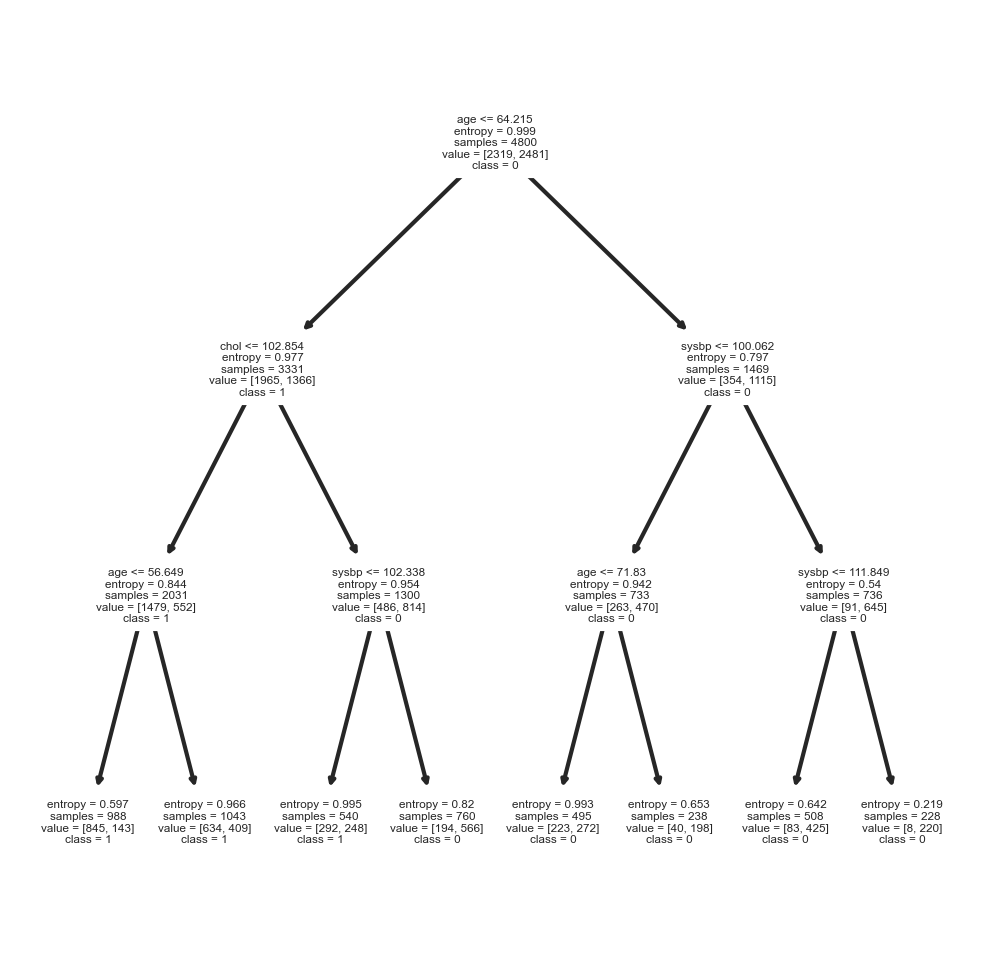

In [137]:
fn=['age','sysbp','diabp','chol']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model6,
               feature_names = fn, 
               class_names=cn,
               filled = False);

# RANDOM FOREST CLASSIFIER

In [138]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [139]:
Kfold =    KFold(n_splits=10)
modelrfc =   RandomForestClassifier(n_estimators=100,max_features=3)
resultsrfc=   cross_val_score(modelrfc,E,F,cv=Kfold)
print(resultsrfc.mean())                            

0.732


In [140]:
modelrfc.fit(Etrain, Ftrain)

RandomForestClassifier(max_features=3)

In [141]:
rfc_pred = modelrfc.predict(Etest)

In [142]:
print('Train Score is : ' ,modelrfc.score(Etrain, Ftrain))
print('Test Score is : ' ,modelrfc.score(Etest, Ftest))

Train Score is :  1.0
Test Score is :  0.7333333333333333


In [143]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [144]:
model_gini.fit(Etrain, Ftrain)

DecisionTreeClassifier(max_depth=3)

In [145]:
#Prediction and computing the accuracy
predrfc=model_gini.predict(Etest)
np.mean(DECPRED==Ftest)                   

0.7308333333333333

# DECISION TREE WITH STANDARDISED VALUES


In [146]:
std

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [147]:
decstd = std

In [148]:
decsE= decstd
decsF= F
decsE

,age,sysbp,diabp,chol
0,1.987803,-1.457585,-1.094761,-2.003609
1,0.368091,-0.121084,-0.588848,0.951463
2,1.016869,1.014219,2.029306,0.023510
3,2.632758,-0.531169,-1.131944,-1.313126
4,2.124091,0.806041,0.024980,-0.784232
...,...,...,...,...
5995,-1.281430,-0.549995,-0.404170,0.685492
5996,0.317109,-0.058504,0.318440,0.425916
5997,-0.576207,-0.211976,1.280174,1.970653
5998,0.360874,0.583594,-0.252835,0.530890


In [149]:
decsF

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [150]:
# Splitting data into train & test
decsEtrain, decsEtest, decsFtrain, decsFtest = train_test_split(decsE, decsF, test_size=0.2, random_state=0)

In [151]:
model67=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model67.fit(decsEtrain,decsFtrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [152]:
decs =model67.predict(decsEtest)

In [153]:
print('Train Score is : ' ,model67.score(decsEtrain, decsFtrain))
print('Test Score is : ' ,model67.score(decsEtest,decsFtest))

Train Score is :  0.7191666666666666
Test Score is :  0.7308333333333333


In [154]:
pd.Series(decs).value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       1
4       1
       ..
1195    1
1196    1
1197    0
1198    1
1199    1
Length: 1200, dtype: int32>

In [155]:
np.mean(decs==decsFtest)*100    

73.08333333333333

In [156]:
print(classification_report(decs,decsFtest))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       633
           1       0.70      0.75      0.72       567

    accuracy                           0.73      1200
   macro avg       0.73      0.73      0.73      1200
weighted avg       0.73      0.73      0.73      1200



In [157]:
model_gini2 = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [158]:
model_gini2.fit(decsEtrain, decsFtrain)

DecisionTreeClassifier(max_depth=3)

In [159]:
#Prediction and computing the accuracy
predsgini2=model67.predict(decsEtest)
np.mean(predsgini2== decsFtest)             

0.7308333333333333

# ENSEMBLE TECHNIQUES

# Bagged Decision Trees for Classification

In [160]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
filename = "pronostico_dataset seperated.csv"

names = ['age''systolic_bp''diastolic_bp''cholesterol''prognosis']
dataframe = read_csv(filename, names=names)
array = dataframe.values
EN =dfL.drop('prog',axis=1)
TEC = dfL['prog']
seed = 4

kfold = KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
modelENTEC = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=7)
resultsBDT = cross_val_score(modelENTEC, EN, TEC, cv=kfold)
print(resultsBDT.mean())

0.7311666666666666


In [161]:
resultsBDT

array([0.71      , 0.71833333, 0.74333333, 0.72833333, 0.73833333,
       0.73      , 0.73166667, 0.72833333, 0.755     , 0.72833333])

# Random Forest Classification

In [162]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

RA =dfL.drop('prog',axis=1)
FO = dfL['prog']
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=None)
modelRF = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
resultsRF = cross_val_score(modelRF,RA,FO, cv=kfold)
print(resultsRF.mean())

0.7298333333333333


# AdaBoost Classification

In [163]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
filename = "pronostico_dataset seperated.csv"

names = ['age''systolic_bp''diastolic_bp''cholesterol''prognosis']
dataframe = read_csv(filename, names=names)
array = dataframe.values

AD=dfL.drop('prog',axis=1)
BO = dfL['prog']

num_trees = 10
seed=7
kfold = KFold(n_splits=10, random_state=None)
modelADBO = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
resultsADBO = cross_val_score(modelADBO,AD,BO, cv=kfold)
print(resultsADBO.mean())


0.7266666666666668


# Stacking Ensemble for Classification

In [164]:
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
filename = "pronostico_dataset seperated.csv"

names = ['age''systolic_bp''diastolic_bp''cholesterol''prognosis']
dataframe = read_csv(filename, names=names)
array = dataframe.values
ST=dfL.drop('prog',axis=1)
AC = dfL['prog']
kfold = KFold(n_splits=10, random_state=None)

# create the sub models
estimators = []
model1 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# create the ensemble model
ensemble = VotingClassifier(estimators)
resultsSTAC = cross_val_score(ensemble, ST,AC, cv=kfold)
print(resultsSTAC.mean())

0.7476666666666667


# XGBOOSTING 

In [165]:
import xgboost
from xgboost import XGBClassifier

In [166]:
modelXGB = XGBClassifier(n_estimators=10,max_depth=3)
modelXGB.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [167]:
modelXGB.feature_importances_

array([0.3484365 , 0.25254935, 0.04149293, 0.3575212 ], dtype=float32)

In [168]:
y_predXGB = modelXGB.predict(X_test)

In [169]:
from sklearn.metrics import confusion_matrix
cmXGB = confusion_matrix(y_test,y_predXGB)
cmXGB

array([[1053,  429],
       [ 331, 1187]], dtype=int64)

In [170]:
from sklearn.metrics import classification_report,accuracy_score

In [171]:
accuracy_score(y_test,y_predXGB)*100  

74.66666666666667

In [172]:
print('Train Score is : ' ,modelXGB.score(X_train,y_train))
print('Test Score is : ' ,modelXGB.score(X_test,y_test))

Train Score is :  0.7596666666666667
Test Score is :  0.7466666666666667


# NAIVE BAYES

In [173]:
from sklearn.naive_bayes import GaussianNB

In [174]:
nb = GaussianNB()
nb.fit(X_train,y_train)
acc = nb.score( X_test,y_test)*100
accuracies = {}
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))  #72.80%

Accuracy of Naive Bayes: 73.77%


In [175]:
acc

73.76666666666667

In [176]:
print('Train Score is : ' ,nb.score(X_train,y_train))
print('Test Score is : ' ,nb.score(X_test,y_test))

Train Score is :  0.7356666666666667
Test Score is :  0.7376666666666667


# NAIVE BAYES WITH STANDARDISED VALUES

In [177]:
nb1 = GaussianNB()
nb1.fit(C_train,D_train)
acc1= nb1.score(C_test,D_test)*100
accuracies['Naive Bayes'] = acc1
print("Accuracy of Naive Bayes: {:.2f}%".format(acc1)) #73.77%

Accuracy of Naive Bayes: 73.77%


In [178]:
print('Train Score is : ' ,nb1.score(C_train,D_train))
print('Test Score is : ' ,nb1.score(C_test,D_test))

Train Score is :  0.7356666666666667
Test Score is :  0.7376666666666667


# CROSS VALIDATION SCORE  KNN

In [179]:
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
import warnings 
warnings.filterwarnings("ignore")
import os
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import os
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [180]:
#Get cross validation score of K-Nearest Neighbors

In [181]:
# plotting the decision boundries for the data 

h = .03  # step size in the mesh
n_neighbors = 3 # No of neighbours
for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(x, y)

In [182]:
cv_scores = []

In [183]:
clf = KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(x, y)


KNeighborsClassifier(n_neighbors=3, weights='distance')

In [184]:
score_knn=cross_val_score(clf, x,y, cv=10)

In [185]:
print("K-Nearest Neighbors Accuracy: %0.2f (+/- %0.2f) with k value equals to 3" % (score_knn.mean(), score_knn.std() * 2))

K-Nearest Neighbors Accuracy: 0.71 (+/- 0.04) with k value equals to 3


In [186]:
k_values = np.arange(1,20)
train_accuracy = []
test_accuracy = []

In [187]:
for i, k in enumerate(k_values):
    # k from 1 to 20(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

In [188]:
print('Train Score is : ' ,knn.score(X_train,y_train))
print('Test Score is : ' ,knn.score(X_test,y_test))

Train Score is :  0.7596666666666667
Test Score is :  0.7436666666666667


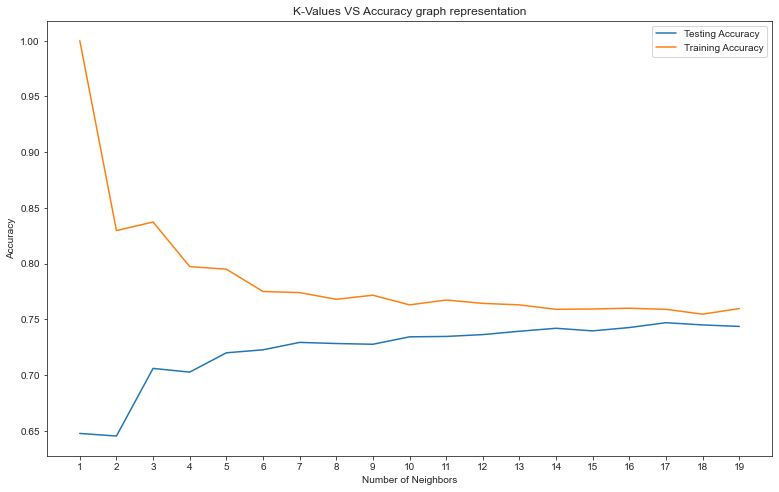

Best accuracy is 0.747 with K = 17


In [189]:
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('K-Values VS Accuracy graph representation')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)

plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

cv_scores.append(np.max(test_accuracy))  

# Tuning of Hyperparameters :- Batch Size and Epochs

In [190]:
#output 

#Best : 0.7471666693687439, using {'batch_size': 10, 'epochs': 10}

#0.7471666693687439,0.010227947574237293 with: {'batch_size': 10, 'epochs': 10}
#0.7420000076293946,0.009755331114356993 with: {'batch_size': 10, 'epochs': 50}
#0.740666675567627,0.006177911772562141 with: {'batch_size': 10, 'epochs': 100}
#0.7425000071525574,0.01208763138197124 with: {'batch_size': 10, 'epochs': 150}
#0.747000002861023,0.01133577323810853 with: {'batch_size': 20, 'epochs': 10}
#0.7441666722297668,0.008611998908792537 with: {'batch_size': 20, 'epochs': 50}
#0.7430000066757202,0.010389621675347668 with: {'batch_size': 20, 'epochs': 100}
#0.7431666731834412,0.008373229806045154 with: {'batch_size': 20, 'epochs': 150}
#0.747000002861023,0.011286657871752015 with: {'batch_size': 40, 'epochs': 10}
#0.7465000033378602,0.00740494623526058 with: {'batch_size': 40, 'epochs': 50}
#0.7413333415985107,0.009153011416163757 with: {'batch_size': 40, 'epochs': 100}
#0.7431666731834412,0.0019293043105353134 with: {'batch_size': 40, 'epochs': 150}

# Tuning of Hyperparameters:- Learning rate and Drop out rate

In [191]:
#OUTPUT

#Best : 0.7493333339691162, using {'dropout_rate': 0.2, 'learning_rate': 0.001}

#0.747000002861023,0.010429648618277176 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
#0.7443333387374877,0.010292921954991669 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
#0.7390000104904175,0.01195360265150603 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
#0.7478333353996277,0.01022794757423729 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
#0.7455000042915344,0.010705647692123503 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
#0.737500011920929,0.012030043482324624 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
#0.7493333339691162,0.013878427278865096 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
#0.7465000033378602,0.009089056801615689 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
#0.740500009059906,0.011050379097694402 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}

# Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [192]:
#OUTPUT

#Best : 0.7490000009536744, using {'activation_function': 'relu', 'init': 'uniform'}

#0.7490000009536744,0.009907899849549272 with: {'activation_function': 'relu', 'init': 'uniform'}
#0.7473333358764649,0.011418784532161842 with: {'activation_function': 'relu', 'init': 'normal'}
#0.5144999861717224,0.003188518037474172 with: {'activation_function': 'relu', 'init': 'zero'}
#0.7453333377838135,0.009213507854029319 with: {'activation_function': 'tanh', 'init': 'uniform'}
#0.7438333392143249,0.008621669881978735 with: {'activation_function': 'tanh', 'init': 'normal'}
#0.5144999861717224,0.003188518037474172 with: {'activation_function': 'tanh', 'init': 'zero'}
#0.7443333387374877,0.009389701725942936 with: {'activation_function': 'linear', 'init': 'uniform'}
#0.7453333377838135,0.0090921124604015 with: {'activation_function': 'linear', 'init': 'normal'}
#0.5144999861717224,0.003188518037474172 with: {'activation_function': 'linear', 'init': 'zero'}

# Tuning of Hyperparameter :-Number of Neurons in activation layer

In [193]:
#OUTPUT

#Best : 0.7455000042915344, using {'neuron1': 8, 'neuron2': 8}

#0.7446666717529297,0.009228569998879508 with: {'neuron1': 4, 'neuron2': 2}
#0.7446666717529297,0.009436916111508273 with: {'neuron1': 4, 'neuron2': 4}
#0.7450000047683716,0.008547246118675184 with: {'neuron1': 4, 'neuron2': 8}
#0.7440000057220459,0.010033268393715438 with: {'neuron1': 8, 'neuron2': 2}
#0.7448333382606507,0.00985166840879567 with: {'neuron1': 8, 'neuron2': 4}
#0.7455000042915344,0.009015410293092233 with: {'neuron1': 8, 'neuron2': 8}
#0.7451666712760925,0.009315450191074015 with: {'neuron1': 16, 'neuron2': 2}
#0.7451666712760925,0.009315450191074015 with: {'neuron1': 16, 'neuron2': 4}
#0.7446666717529297,0.009582961868610042 with: {'neuron1': 16, 'neuron2': 8}

# ANN 

In [197]:
from keras.models import Sequential
from keras.layers import Dense

In [198]:
ann_x1 = x1
ann_x1

,age,sysbp,diabp,chol
0,77.196340,85.288742,80.021878,79.957109
1,63.529850,99.379736,84.852361,110.382411
2,69.003986,111.349455,109.850616,100.828246
3,82.638210,95.056128,79.666851,87.066303
4,78.346286,109.154591,90.713220,92.511770
...,...,...,...,...
5995,49.611850,94.857639,86.615671,107.643986
5996,63.099686,100.039527,93.515186,104.971404
5997,55.562243,98.421446,102.697875,120.875951
5998,63.468956,106.809289,88.060631,106.052213


In [199]:
ann_y1 = y1
ann_y1

0       1
1       1
2       1
3       1
4       1
       ..
5995    0
5996    1
5997    1
5998    1
5999    0
Name: prog, Length: 6000, dtype: int32

In [200]:
# create model
modelANN = Sequential()
modelANN.add(Dense(12, input_dim=4, kernel_initializer='uniform', activation='relu'))
modelANN.add(Dense(8, bias_initializer='uniform', activation='relu'))
modelANN.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [201]:
# Compile model
modelANN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [202]:
# Fit the model
modelANN.fit(ann_x1,ann_y1, validation_split=0.15, epochs=150, batch_size=10)

Epoch 1/150
510/510 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5273 - val_loss: 0.6857 - val_accuracy: 0.5233
Epoch 2/150
510/510 [==============================] - 1s 1ms/step - loss: 0.6835 - accuracy: 0.5551 - val_loss: 0.6780 - val_accuracy: 0.5311
Epoch 3/150
510/510 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.5573 - val_loss: 0.6794 - val_accuracy: 0.5344
Epoch 4/150
510/510 [==============================] - 1s 992us/step - loss: 0.6725 - accuracy: 0.5792 - val_loss: 0.6639 - val_accuracy: 0.6033
Epoch 5/150
510/510 [==============================] - 1s 1ms/step - loss: 0.6677 - accuracy: 0.5882 - val_loss: 0.6617 - val_accuracy: 0.5900
Epoch 6/150
510/510 [==============================] - 1s 2ms/step - loss: 0.6665 - accuracy: 0.5898 - val_loss: 0.6608 - val_accuracy: 0.6167
Epoch 7/150
510/510 [==============================] - 1s 2ms/step - loss: 0.6649 - accuracy: 0.5867 - val_loss: 0.6565 - val_accuracy: 0.61

In [203]:
# evaluate the model
scoresANN = modelANN.evaluate(ann_x1,ann_y1)
print("%s: %.2f%%" % (modelANN.metrics_names[1], scoresANN[1]*100))

188/188 [==============================] - 0s 974us/step - loss: 0.5130 - accuracy: 0.7477
accuracy: 74.77%


# MODEL VALIDATION METHODS

In [204]:
from sklearn.linear_model import LogisticRegression
modelval = LogisticRegression()
modelval.fit(X_train, y_train)
resultval = modelval.score(X_test, y_test)

In [205]:
resultval

0.7526666666666667

In [206]:
resultval*100

75.26666666666667

# Final Results of all the Models

In [2]:
import pandas as pd

data = {'Model':  ['Logistic Regression Model Accuracy', 'LOGISTIC REGRESSION WITH STANDARDISED VALUES','SVM LINEAR KERNEL','SVM POLY KERNEL','SVM RBF KERNEL','SVM','SVM POLY KERNEL WITH STANDARDISED VALUES','SVM','SVM LINEAR KERNEL WITH NORMALIZED VALUES','SVM POLY KERNEL WITH NORMALIZED VALUES','SVM RBF STD','DECISION TREE','DECISION TREE(GINI MODEL)','DECISION TREE WITH STANDARDISED VALUES','BAGGED DECISION TREE','RANDOM FOREST CLASSIFICATION','ADABOOST CLASSIFICATION','STACKING ENSEMBLE','XGBOOSTING','NAIVE BAYES C-OUT STANDARD VALUES','NAIVE BAYES WITH STANDARD VALUES','KNN','TofHy:batch size and epochs','TofHy:learning rate and drop out rate','TofHy:Activation fxn &kernel initializer','TofHy:No.of Neurons in activation layer','ANN_CAPPED_DATA','ANN_ORIGINAL_DATA','MODEL VALIDATION_LOGISTIC REGRESSION'],
        'Train_Accuracy': ['73.96', '73.96','74.11','74.6','74.8','74.08','74.08','75.31','74.13','74.6','75.24','71.91','73.08','71.91','73.116','72.61','72.66','74.7','75.06','73.76','73.56','73.53','74.71','74.93','74.90','74.55','74.33','73.87','74.46'],
        'Test_Accuracy': ['75.26', '75.26','75.4','75.33','75.46','75.4','74.06','75.66','75.53','75.66','75.66','73.04','_','73.08','_','_','_','_','75.93','73.56','73.77','75.96','_','_','_','_','_','_','_']}

final_results = pd.DataFrame(data)

final_results =final_results.sort_values("Train_Accuracy", ascending=False)
final_results

,Model,Train_Accuracy,Test_Accuracy
7,SVM,75.31,75.66
10,SVM RBF STD,75.24,75.66
18,XGBOOSTING,75.06,75.93
23,TofHy:learning rate and drop out rate,74.93,_
24,TofHy:Activation fxn &kernel initializer,74.90,_
4,SVM RBF KERNEL,74.8,75.46
22,TofHy:batch size and epochs,74.71,_
17,STACKING ENSEMBLE,74.7,_
3,SVM POLY KERNEL,74.6,75.33
9,SVM POLY KERNEL WITH NORMALIZED VALUES,74.6,75.66
